# (a) & (b) & (d) DNN Model



In [ ]:
pip install keras-tuner --upgrade

In [13]:
# Import Liraries
from numpy import unique
from numpy import argmax
from pandas import read_csv
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import keras_tuner as kt
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
# Load Data 
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
dataframe = read_csv(url, header=None)
dataset = dataframe.values

In [5]:
# Split Dataset
X, y = dataset[:, 1:-1], dataset[:, -1]
X, y = X.astype('float'), y.astype('float')
n_features = X.shape[1]

In [6]:
# Encoding to Integer from String values by Label Encoder 
y = LabelEncoder().fit_transform(y)
n_class = len(unique(y))

In [7]:
# Training & Test Data Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [8]:
# Deep Nural Network Model (DNN)
model = Sequential()
model.add(Dense(20, input_dim=n_features, activation='tanh', kernel_initializer='normal'))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(n_class, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                160       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 28)                308       
                                                                 
Total params: 678
Trainable params: 678
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Model 
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
#Model Fitting
history = model.fit(X_train, y_train, epochs=100, batch_size=30, validation_data=(X_val, y_val))

Epoch 1/100
90/90 [==============================] - 1s 6ms/step - loss: 3.1179 - accuracy: 0.1336 - val_loss: 2.8073 - val_accuracy: 0.1286
Epoch 2/100
90/90 [==============================] - 0s 3ms/step - loss: 2.6507 - accuracy: 0.1613 - val_loss: 2.5077 - val_accuracy: 0.1719
Epoch 3/100
90/90 [==============================] - 0s 3ms/step - loss: 2.5077 - accuracy: 0.1497 - val_loss: 2.4550 - val_accuracy: 0.1599
Epoch 4/100
90/90 [==============================] - 0s 3ms/step - loss: 2.4708 - accuracy: 0.1467 - val_loss: 2.4238 - val_accuracy: 0.1570
Epoch 5/100
90/90 [==============================] - 0s 3ms/step - loss: 2.4316 - accuracy: 0.1684 - val_loss: 2.3794 - val_accuracy: 0.1839
Epoch 6/100
90/90 [==============================] - 0s 3ms/step - loss: 2.3835 - accuracy: 0.1811 - val_loss: 2.3187 - val_accuracy: 0.2212
Epoch 7/100
90/90 [==============================] - 0s 3ms/step - loss: 2.3172 - accuracy: 0.2298 - val_loss: 2.2568 - val_accuracy: 0.2377
Epoch 8/100
9

In [11]:
# Evaluate on Test 
predict = model.predict(X_test)
predict = argmax(predict, axis=-1).astype('int')
acc = accuracy_score(y_test, predict)
print('Accuracy: %.3f' % acc)

27/27 [==============================] - 0s 1ms/step
Accuracy: 0.266


In [14]:
pd.DataFrame(list(zip(y_test,predict)), columns = ['Actual Values', 'Predicted Values'])

,Actual Values,Predicted Values
0,9,7
1,7,7
2,8,6
3,9,7
4,15,8
...,...,...
831,7,8
832,10,10
833,7,8
834,9,10


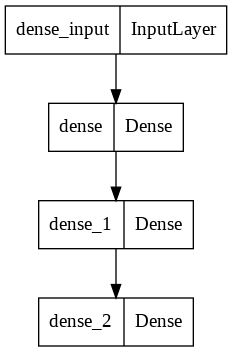

In [15]:
# Graph of the Model
tf.keras.utils.plot_model(
    model,
    to_file='abalone-db.png',
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False
)

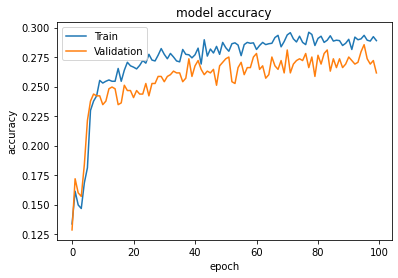

In [16]:
# Generating graph for Accuracy & Validation Accuracy 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

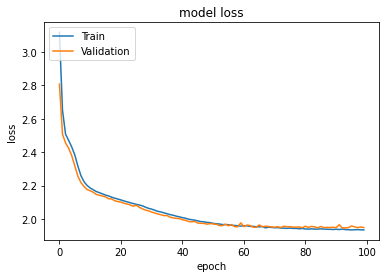

In [17]:
# Generating graph for Loss & Validation Loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# (c) * (d) Improved DNN Model

In [18]:
# Deep Nural Network Model (DNN)
model = Sequential()
model.add(Dense(20, input_dim=n_features, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(n_class, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20)                160       
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 28)                308       
                                                                 
Total params: 678
Trainable params: 678
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Compile the Model 
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Model Fitting
hist = model.fit(X_train, y_train, batch_size=32,verbose=1, validation_data=(X_test, y_test))
hist = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2, validation_split=0.5)

In [21]:
# Evaluate on Test 
predict = model.predict(X_test)
predict = argmax(predict, axis=-1).astype('int')
acc = accuracy_score(y_test, predict)
print('Accuracy: %.3f' % acc)

27/27 [==============================] - 0s 2ms/step
Accuracy: 0.251


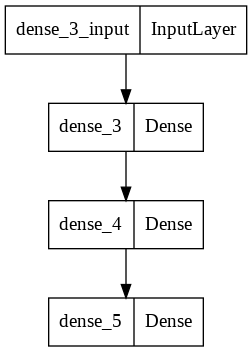

In [22]:
# Graph of the Model
tf.keras.utils.plot_model(
    model,
    to_file='abalone-dc.png',
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False
)

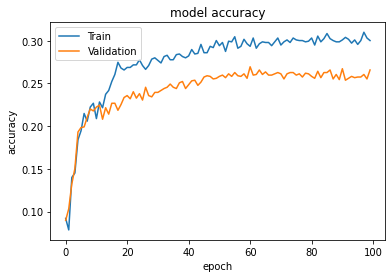

In [23]:
# Generating graph for Accuracy & Validation Accuracy 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

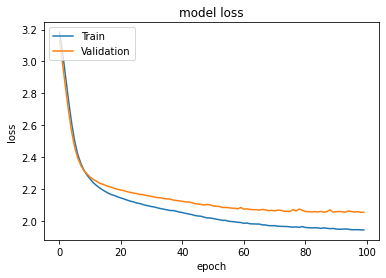

In [24]:
# Generating graph for Loss & Validation Loss 
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()